<a href="https://colab.research.google.com/github/chenghan0516/FakeNewsDetection/blob/master/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#顯示GPU

In [1]:
!nvidia-smi

Wed Jul 21 00:32:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#環境建置：

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!pwd
%cd /content/drive/My Drive/FakeNewsNet/
!pip install transformers

import os
import pandas as pd
import numpy as np
import json
import heapq
import matplotlib.pyplot as plt
# subject="politifact"
subject="gossipcop"
path = "Bert"
save_every_pt = 1000
if not os.path.isdir('{}/current'.format(path)):
  os.makedirs('{}/current'.format(path))

Mounted at /content/drive
/content
/content/drive/My Drive/FakeNewsNet
     |████████████████████████████████| 2.5 MB 8.5 MB/s 
     |████████████████████████████████| 3.3 MB 62.1 MB/s 
     |████████████████████████████████| 895 kB 33.0 MB/s 


#進度顯示用函式：

In [3]:
import time
import math
def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return "%dm %ds" % (m, s)
def timeSince(since, percent):
  now = time.time()
  s = now - since
  if percent!=0:
    es = s / (percent)
    rs = es - s
    return "%s (- %s)" % (asMinutes(s), asMinutes(rs))
  else:
    return "%s (- INF)" % (asMinutes(s))

def progress(start, cur, total_len, loss, cur_read=0):
  print("{} ({}%)\nloss = {}".format(
    timeSince(start,(cur-cur_read) / (total_len-cur_read)),
    (cur / total_len)* 100,
    loss
    )
  )

#預處理：

In [ ]:
#每個句子分開來tokenize
!pip install nltk
import nltk
nltk.download("popular")

from transformers import BertTokenizerFast
data_raw = pd.read_csv(subject+"_clean.csv")

#------------------------------------------------------------------------------- Preprocess -------------------------------------------------------------------

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

total_rows = data_raw.shape[0]
token_data = pd.DataFrame({"title":[],"text":[],"tag":[],"title_len":[],"text_len":[]})
real_data_num = -1

start = time.time()
for i,temp in data_raw.iterrows():
  if(i%10==0):
    progress(start,i,total_rows,"N/A")
  
  title_token = []
  if pd.notna(temp["title"]):
    title_sentences = nltk.sent_tokenize(temp["title"])
    title_token = tokenizer(title_sentences,truncation=True,padding=True,max_length=50)["input_ids"]

  text_token = []
  if pd.notna(temp["text"]):
    text_sentences = nltk.sent_tokenize(temp["text"])
    text_token = tokenizer(text_sentences,truncation=True,padding=True,max_length=50)["input_ids"]

  token_data = token_data.append({"title":title_token,"text":text_token,"tag":temp["label"],"title_len":len(title_token),"text_len":len(text_token)},ignore_index = True)
  if real_data_num ==-1 and temp["label"]==0:
    real_data_num = i
print("total data number: {}".format(token_data.shape[0]))
print("real news number: {}".format(real_data_num))
print("fake news number: {}".format(token_data.shape[0]-real_data_num))

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt


0m 0s (- INF) (0.0%)
loss = N/A
0m 0s (- 4m 49s) (0.05674724775848371%)
loss = N/A
0m 0s (- 3m 55s) (0.11349449551696741%)
loss = N/A
0m 0s (- 3m 22s) (0.17024174327545114%)
loss = N/A
0m 0s (- 3m 28s) (0.22698899103393483%)
loss = N/A
0m 0s (- 3m 16s) (0.2837362387924186%)
loss = N/A
0m 0s (- 3m 8s) (0.34048348655090227%)
loss = N/A
0m 0s (- 3m 0s) (0.39723073430938605%)
loss = N/A
0m 0s (- 2m 56s) (0.45397798206786966%)
loss = N/A
0m 0s (- 2m 55s) (0.5107252298263534%)
loss = N/A
0m 0s (- 2m 54s) (0.5674724775848372%)
loss = N/A
0m 1s (- 2m 52s) (0.6242197253433208%)
loss = N/A
0m 1s (- 2m 50s) (0.6809669731018045%)
loss = N/A
0m 1s (- 2m 49s) (0.7377142208602883%)
loss = N/A
0m 1s (- 2m 49s) (0.7944614686187721%)
loss = N/A
0m 1s (- 2m 48s) (0.8512087163772558%)
loss = N/A
0m 1s (- 2m 50s) (0.9079559641357393%)
loss = N/A
0m 1s (- 2m 51s) (0.9647032118942231%)
loss = N/A
0m 1s (- 2m 48s) (1.0214504596527068%)
loss = N/A
0m 1s (- 2m 48s) (1.0781977074111906%)
loss = N/A
0m 1s (- 2m 

In [ ]:
# 切分training set跟testing set
real_random_index_test = list(range(0, real_data_num))
np.random.shuffle(real_random_index_test)
fake_random_index_test = list(range(real_data_num, token_data.shape[0]))
np.random.shuffle(fake_random_index_test)
random_index_test = real_random_index_test[:823]+fake_random_index_test[:823]
random_index_train = real_random_index_test[823:4115]+fake_random_index_test[823:4115]
testing_set = []
training_set = []
for i in range(token_data.shape[0]):
  if i in random_index_test:
    testing_set.append(True)
  else:
    testing_set.append(False)
  if i in random_index_train:
    training_set.append(True)
  else:
    training_set.append(False)
    
print(token_data[testing_set])
print(token_data[training_set])

token_data[testing_set].to_csv(path+"/"+subject+"_token_data_bert_test.csv",index=False)
token_data[training_set].to_csv(path+"/"+subject+"_token_data_bert_train.csv",index=False)

                                                   title  ... text_len
7      [[101, 2043, 2097, 1520, 10702, 1521, 2161, 10...  ...     25.0
17     [[101, 1996, 5593, 3109, 1997, 1520, 1996, 243...  ...     89.0
42     [[101, 2745, 20934, 3468, 1998, 2564, 25412, 2...  ...     14.0
53     [[101, 9392, 14884, 8415, 2015, 2011, 2023, 10...  ...     25.0
63     [[101, 11928, 2050, 16216, 20473, 1010, 15453,...  ...      2.0
...                                                  ...  ...      ...
17596  [[101, 6796, 12170, 22669, 1005, 3236, 2007, 6...  ...     15.0
17599  [[101, 2106, 28315, 4502, 17756, 7221, 12669, ...  ...     20.0
17605  [[101, 25439, 4122, 2000, 2131, 2362, 2007, 37...  ...      8.0
17608  [[101, 7673, 8685, 1004, 4074, 9172, 2298, 206...  ...      5.0
17612                     [[101, 2931, 2034, 7057, 102]]  ...     23.0

[1646 rows x 5 columns]
                                                   title  ... text_len
2      [[101, 1045, 2699, 5035, 10556, 13639, 6182, 

##確認資料集中REAL和FAKE的字彙是否平衡

In [ ]:
token_data_read_pd = pd.read_csv(path+"/"+subject+"_token_data_bert.csv")
token_data_read = token_data_read_pd.to_numpy()
token_data_read_pd

,title,text,tag,title_len,text_len
0,"[[101, 9008, 15419, 3678, 11193, 2000, 6848, 5...","[[101, 9008, 15419, 3678, 7283, 2987, 1005, 10...",1.0,1.0,22.0
1,"[[101, 8804, 13601, 102]]","[[101, 2839, 2006, 2137, 2547, 2186, 9446, 880...",1.0,1.0,85.0
2,"[[101, 1045, 2699, 5035, 10556, 13639, 6182, 2...","[[101, 2013, 2045, 1010, 2017, 6653, 2000, 199...",1.0,1.0,5.0
3,"[[101, 24550, 19542, 21357, 2015, 4164, 10951,...","[[101, 1006, 13229, 1007, 2019, 6832, 24550, 1...",1.0,1.0,13.0
4,"[[101, 3782, 6473, 1010, 19561, 6173, 2829, 10...","[[101, 1996, 8072, 1997, 5365, 2024, 2007, 177...",1.0,1.0,11.0
...,...,...,...,...,...
20518,"[[101, 2244, 2340, 1024, 12330, 3342, 1023, 10...","[[101, 2047, 2259, 1010, 6396, 1011, 2244, 218...",0.0,1.0,4.0
20519,"[[101, 11838, 5608, 15686, 2000, 2543, 6853, 2...","[[101, 2053, 6853, 1010, 3626, 2030, 2060, 213...",0.0,1.0,50.0
20520,"[[101, 1996, 1021, 5751, 2008, 2585, 10272, 35...","[[101, 2005, 1996, 4895, 5498, 10711, 3064, 10...",0.0,1.0,6.0
20521,"[[101, 4575, 2175, 28886, 1998, 9345, 27916, 2...","[[101, 10651, 1006, 2244, 2538, 1010, 1016, 10...",0.0,1.0,21.0


In [ ]:
def count_preprocess(raw_data):
  title = [eval(i) for i in raw_data[:,0]]
  content = [eval(i) for i in raw_data[:,1]]
  
  temp = []
  for i in range(len(raw_data)):
    news = []
    for j in title[i]:
      news+=j
    for j in content[i]:
      news+=j
    temp.append(news)
  
  return temp

real_data = count_preprocess(token_data_read[:15376,:2])
fake_data = count_preprocess(token_data_read[15376:,:2])

In [ ]:
def get_word_counts(data):
  temp={}
  for i in data:
    for j in i:
      if j in temp:
        temp[j]+=1
      else:
        temp[j]=1
  return temp

real_word_rank=get_word_counts(real_data)
fake_word_rank=get_word_counts(fake_data)

In [ ]:
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def gen_word_counts_pd(word_rank):
  temp = pd.DataFrame({'word':[],'count':[]})
  for i in word_rank:
    if i==101 or i == 102 or i==0:
      continue
    word = tokenizer.decode(i)
    if word in stopwords.words():
      continue
    temp = temp.append(pd.DataFrame({'word':[word],'count':[word_rank[i]]}))
  return temp

real_word_rank_pd = gen_word_counts_pd(real_word_rank)
fake_word_rank_pd = gen_word_counts_pd(fake_word_rank)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
real_word_rank_top5000 = set(real_word_rank_pd.sort_values(by=['count'],ascending=False)["word"][:5000])
fake_word_rank_top5000 = set(fake_word_rank_pd.sort_values(by=['count'],ascending=False)["word"][:5000])
common_words = fake_word_rank_top5000.intersection(real_word_rank_top5000)
print(len(real_word_rank_top5000),len(fake_word_rank_top5000))
len(common_words)

5000 5000


4247

In [ ]:
diff_real = [word for word in real_word_rank_top5000 if not word in common_words]
diff_fake = [word for word in fake_word_rank_top5000 if not word in common_words]

for i in range(753):
  print("real: {} \t\t\t\tfake: {}".format(diff_real[i],diff_fake[i]))

real: robot 				fake: ##mail
real: ##ann 				fake: cambodia
real: wrap 				fake: thunder
real: holland 				fake: ##end
real: lipstick 				fake: ##broken
real: glimpse 				fake: buying
real: fate 				fake: ##gger
real: ##nington 				fake: ##ror
real: tournament 				fake: phillip
real: ##ali 				fake: alec
real: kelley 				fake: crush
real: assaulted 				fake: outrageous
real: edwards 				fake: twigs
real: download 				fake: andrews
real: infinity 				fake: influenced
real: stan 				fake: meetings
real: jedi 				fake: forgive
real: andrea 				fake: testimony
real: pt 				fake: ##bit
real: jax 				fake: 129
real: danielle 				fake: commonwealth
real: instantly 				fake: privately
real: ##ile 				fake: bafta
real: sponsors 				fake: ##hian
real: ##elo 				fake: fallen
real: aka 				fake: individuals
real: carole 				fake: lately
real: stomach 				fake: conducted
real: ##idal 				fake: proceeds
real: reflect 				fake: ##lli
real: vega 				fake: 113
real: serves 				fake: headlining
real: ve

#模型：


In [4]:
#------------------------------------------------------------------------------- training shits -------------------------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import BertModel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

GRU_HIDDEN_SIZE=128

# Bert-Embedding
class BiGRU(nn.Module):
  def __init__(self):
    super(BiGRU, self).__init__()
    self.embedding = BertModel.from_pretrained('bert-base-uncased')
    self.gru = nn.GRU(
        input_size=768,
        hidden_size=GRU_HIDDEN_SIZE,
        dropout=0.3,
        num_layers=1,
        bidirectional=True,
    )

  def forward(self, tokens, masks=None):
    # BERT
    embedded = self.embedding(tokens, attention_mask=masks)["last_hidden_state"]
    cls_vector = embedded[:,0,:].reshape(-1,1,768)
    # GRU
    _, hidden = self.gru(cls_vector)

    return hidden[-1]

class FakeNewsDetection(nn.Module):
  def __init__(self):
    super(FakeNewsDetection,self).__init__()
    self.bertEmbed = BiGRU()
    self.FC_1 = nn.Linear(GRU_HIDDEN_SIZE,128)
    self.FC_2 = nn.Linear(128,32)
    self.FC_3 = nn.Linear(32,1)
    self.Dropout = nn.Dropout(p=0.3)
  
  def forward(self, titles, texts):
    count = 0
    titleEmbed = torch.zeros(GRU_HIDDEN_SIZE).to(device)
    textEmbed = torch.zeros(GRU_HIDDEN_SIZE).to(device)
    newsEmbed = torch.zeros(GRU_HIDDEN_SIZE).to(device)
    if len(titles)!=0:
      titleEmbed = self.bertEmbed(titles)
      count+=1
    if len(texts)!=0:
      textEmbed = self.bertEmbed(texts)
      count+=1
    if count!=0:
      newsEmbed = (titleEmbed+textEmbed)/count
    
    output = self.FC_1(newsEmbed.to(device))
    output = self.FC_2(F.relu(output))
    output = self.FC_3(F.relu(output))

    return F.sigmoid(output)


#訓練部分

##訓練用函式(輸入一篇新聞)：

In [5]:
max_sentence_num = 5000
def train(train_model,X,y,optimizer,loss_func):
  optimizer.zero_grad()
  predict = train_model(torch.tensor(eval(X[0])[:max_sentence_num]).to(device),torch.tensor(eval(X[1])[:max_sentence_num]).to(device))
  loss = loss_func(predict.view(1), torch.tensor([y]).to(device))
  # print("predict: {}\nans:     {}\n loss: {}".format(predict,torch.tensor([y]),loss))
  loss.backward()
  optimizer.step()
  return predict,loss.item()

def train_model(token_data_read,train_index, test_index,cur_read=-1):
  FND_model = FakeNewsDetection().to(device)
  optimizer = optim.Adam(FND_model.parameters(), lr=0.0001)
  scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.8)
  if if_continue:
    FND_model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    scheduler.load_state_dict(checkpoint['scheduler_state_dict'])

  loss_func = nn.BCELoss()
  FND_model.train()
  losses=[]
  cur = 0
  start = time.time()
  freezed_bert_layer_num_temp = freezed_bert_layer_num

  if if_continue: #若接續訓練
    f = open('{}/current/fold_{}/loss.txt'.format(path,fold), 'a')
  else: #若非接續訓練
    f = open('{}/current/fold_{}/loss.txt'.format(path,fold), 'w')
  for epoch in range(EPOCH):
    #Freeze layers
    modules = [FND_model.bertEmbed.embedding]
    for module in modules:
      for param in module.parameters():
        param.requires_grad = False
    if epoch>=end_warmup:
      modules = [FND_model.bertEmbed.embedding.encoder.layer[freezed_bert_layer_num_temp:]]
      for module in modules:
        for param in module.parameters():
          param.requires_grad = True
      if progressive_unfreeze:
        freezed_bert_layer_num_temp-=1
    #迭代訓練資料
    for i in train_index:
      #走到上次進度
      if cur<=cur_read:
        cur+=1
        continue
      #訓練BERT時跳過過長的文章
      if epoch>=10 and len(eval(token_data_read[random_index[i]][1]))>200:
        print("skip: {}".format(len(eval(token_data_read[random_index[i]][1]))))
        continue

      #訓練
      predict,loss = train(FND_model,token_data_read[random_index[i]][:2],float(token_data_read[random_index[i]][2]),optimizer,loss_func)
      losses.append(loss)

      #紀錄模型
      if cur!=0 and cur % save_every_pt==0:
        #模型
        print("start save checkpoint")
        torch.save({'cur':cur,
                    'model_state_dict':FND_model.state_dict(),
                    'optimizer_state_dict':optimizer.state_dict(),
                    'scheduler_state_dict':scheduler.state_dict()}, '{}/current/fold_{}/FND_model_{}.pt'.format(path,fold,cur))
        #loss
        print("start save loss")
        for i in losses:
          f.write(str(i)+"\n")
        losses=[]
        #更新progress
        print("start save progress")
        with open('{}/current/train_progress.json'.format(path), 'w') as progress_json_file:
            json.dump({'fold':fold,'cur':cur}, progress_json_file)
        print("done saving")
      
      #顯示進度
      if cur % 10==0:
        progress(start,cur,train_index.shape[0]*EPOCH,loss, cur_read)
      cur+=1

    if cur>cur_read:
      scheduler.step()
  f.close()

  f = open('{}/current/fold_{}/loss.txt'.format(path,fold), 'r')
  losses = [float(i) for i in list(f.read().split("\n")[:-1])]
  f.close()
  plt.plot(range(len(losses)),losses)
  plt.savefig('{}/current/fold_{}/loss.png'.format(path,fold))
  plt.show()
  return losses

##訓練前讀檔：

In [6]:
from sklearn.model_selection import KFold
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
token_data_read_pd = pd.read_csv(path+"/"+subject+"_token_data_bert_train.csv")
# token_data_read_pd_temp = token_data_read_pd[token_data_read_pd["text_len"]<500]
token_data_read = token_data_read_pd.to_numpy()

if_continue = os.path.isfile('{}/current/train_progress.json'.format(path))
if if_continue:
  with open('{}/current/train_progress.json'.format(path), 'r') as progress_json_file:
    progress_json = json.load(progress_json_file)
  checkpoint = torch.load( '{}/current/fold_{}/FND_model_{}.pt'.format(path,progress_json['fold'],progress_json['cur']))
else:
  progress_json = {'fold':0,'cur':-1}
  
if os.path.isfile('{}/current/random.txt'.format(path)):
  print("old random")
  f = open('{}/current/random.txt'.format(path), 'r')
  random_index = [int(i) for i in list(f.read().split("\n")[:-1])]
  f.close()
else:
  print("new random")
  random_index = list(range(token_data_read.shape[0]))
  np.random.shuffle(random_index)
  f = open('{}/current/random.txt'.format(path), 'w')
  for i in random_index:
    f.write(str(i)+"\n")
  f.close()

new random


In [7]:
title_len = [0, 0, 0]
text_len = [0, 0, 0]
for data in token_data_read:
  if data[-2]<=3:
    title_len[0]+=1
  elif data[-2]<=5:
    title_len[1]+=1
  else:
    title_len[2]+=1
  
  if data[-1]<=50:
    text_len[0]+=1
  elif data[-1]<=300:
    text_len[1]+=1
  else:
    text_len[2]+=1
print(title_len)
print(text_len)

[6578, 3, 3]
[5963, 595, 26]


##訓練：

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero

Streaming output truncated to the last 5000 lines.
133m 38s (- 38m 52s) (77.4634516802734%)
loss = 0.06332650035619736
133m 38s (- 38m 51s) (77.47294475033226%)
loss = 0.14049793779850006
133m 39s (- 38m 50s) (77.48243782039111%)
loss = 0.1384521722793579
133m 40s (- 38m 49s) (77.49193089044996%)
loss = 1.7086594104766846
133m 41s (- 38m 48s) (77.50142396050883%)
loss = 0.3368840217590332
133m 42s (- 38m 47s) (77.51091703056768%)
loss = 0.146779403090477
133m 43s (- 38m 46s) (77.52041010062655%)
loss = 0.012752196751534939
133m 44s (- 38m 45s) (77.5299031706854%)
loss = 0.015762949362397194
133m 44s (- 38m 44s) (77.53939624074425%)
loss = 0.002912825671955943
skip: 207
133m 45s (- 38m 43s) (77.54888931080312%)
loss = 0.23253965377807617
133m 46s (- 38m 42s) (77.55838238086197%)
loss = 0.04012352228164673
133m 47s (- 38m 41s) (77.56787545092084%)
loss = 0.441275030374527
133m 48s (- 38m 40s) (77.57736852097969%)
loss = 1.4406979084014893
133m 48s (- 38m 39s) (77.58686159103854%)
loss = 

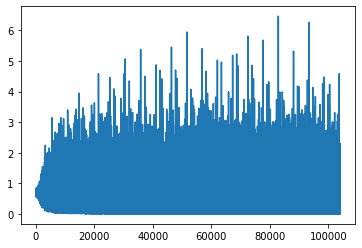

end


In [9]:
EPOCH = 20
end_warmup = 20
freezed_bert_layer_num = 12
progressive_unfreeze = False

fold=0
kf = KFold(n_splits=5, shuffle=False)
cur_read = progress_json['cur']
for train_index, test_index in kf.split(random_index):
  # training-----------------------------------------------------------------------------------------------------------------------------
  fold+=1
  if fold<progress_json['fold']:
    continue

  if not os.path.isdir('{}/current/fold_{}'.format(path,fold)):
    os.makedirs('{}/current/fold_{}'.format(path,fold))

  losses = train_model(token_data_read,train_index, test_index, cur_read)
  cur_read = -1
  if_continue = False
  break

print("end")

#驗證/測試部分

##驗證/測試用函式：

In [5]:
def get_best_pt(losses,n):
  plot_loss=[]
  waiting_queue=[]
  sum=0
  for i,loss in enumerate(losses):
    sum+=loss
    if i!=0 and i%save_every_pt==0:
      avg_loss=sum/save_every_pt
      plot_loss.append(avg_loss)
      sum=0
  plt.plot(range(len(plot_loss)),plot_loss)
  plt.savefig('{}/current/fold_{}/loss_batched.png'.format(path,fold))
  plt.show()
  waiting_queue = [int(i)*save_every_pt for i in list( map(plot_loss.index, heapq.nsmallest(n, plot_loss)) )]
  return waiting_queue
  
def evaluate(eval_model,X,y,loss_func):
  with torch.no_grad():
    predict = eval_model(torch.tensor(eval(X[0])).to(device),torch.tensor(eval(X[1])).to(device))
    loss = loss_func(predict.view(1), torch.tensor([y]).to(device))
  return predict,loss.item()

def evaluate_model(token_data_read,eval_index, eval_pt):
  confusion_matrix = [[0,0],[0,0]]

  checkpoint = torch.load( '{}/current/fold_{}/FND_model_{}.pt'.format(path,fold,eval_pt))
  eval_model = FakeNewsDetection().to(device)
  eval_model.load_state_dict(checkpoint['model_state_dict'])

  loss_func = nn.BCELoss()
  eval_model.eval()
  total_loss=0
  cur_eval=0
  start_eval = time.time()

  for i in eval_index:
    predict,loss = evaluate(eval_model,token_data_read[random_index_read[i]][:-3],float(token_data_read[random_index_read[i]][-3]),loss_func)
    total_loss+=loss
    confusion_matrix[int(token_data_read[random_index_read[i]][-3])][predict>0.5]+=1
    if cur_eval%10==0:
      print("num in waiting_queue: {}".format(temp_waiting_queue_num))
      progress(start_eval,cur_eval,len(eval_index),total_loss/(cur_eval+1),0)
    cur_eval+=1

  accuracy = (confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
  if confusion_matrix[1][1]+confusion_matrix[0][1]==0:
    precision = "undefine"
  else:
    precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
  if confusion_matrix[1][1]+confusion_matrix[1][0]==0:
    recall = "undefine"
  else:
    recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
  if precision=="undefine" or recall=="undefine":
    F1 = "undefine"
  else:
    F1 = 2*precision*recall/(precision+recall)
  print("average loss: {}".format(total_loss/len(eval_index)))
  print("confusion_matrix: {}".format(confusion_matrix))
  print(" Accuracy: {}".format(accuracy))
  print(" Precision: {}".format(precision))
  print(" Recall: {}".format(recall))
  print("F1: {}".format(F1))
  return pd.DataFrame({'num_pt':[eval_pt],'Avg_Loss':[total_loss/len(eval_index)],'Accuracy':[accuracy],'Precision':[precision],'Recall':[recall],'F1':[F1]})

##驗證部分

###驗證前讀檔：

In [6]:
from sklearn.model_selection import KFold
token_data_read_pd = pd.read_csv(path+"/"+subject+"_token_data_bert_train.csv")
# token_data_read_pd = token_data_read_pd[token_data_read_pd["text_len"]<250]
token_data_read = token_data_read_pd.to_numpy() 

f = open('{}/current/random.txt'.format(path), 'r')
random_index_read = [int(i) for i in list(f.read().split("\n")[:-1])]
f.close()

if_continue = os.path.isfile('{}/current/eva_progress.json'.format(path))
if if_continue:
  with open('{}/current/eva_progress.json'.format(path), 'r') as progress_json_file:
    progress_json = json.load(progress_json_file)
else:
  progress_json = {'fold':0,'temp_waiting_queue_num':0}

evaluate_or_train = 1  # 0 = training set, 1 = evaluating set
best_n = 50
waiting_queue_begin = 10
waiting_queue_end = best_n

###驗證:

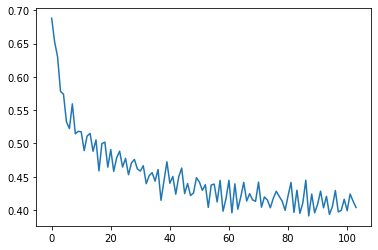

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero

num in waiting_queue: 11
0m 0s (- INF) (0.0%)
loss = 0.5882903337478638
num in waiting_queue: 11
0m 0s (- 2m 4s) (0.759301442672741%)
loss = 0.4110410816290162
num in waiting_queue: 11
0m 1s (- 1m 40s) (1.518602885345482%)
loss = 0.4807223684730984
num in waiting_queue: 11
0m 2s (- 1m 38s) (2.277904328018223%)
loss = 0.4957506142917179
num in waiting_queue: 11
0m 3s (- 1m 43s) (3.037205770690964%)
loss = 0.49705537585200876
num in waiting_queue: 11
0m 4s (- 1m 43s) (3.7965072133637054%)
loss = 0.5156379553498518
num in waiting_queue: 11
0m 4s (- 1m 41s) (4.555808656036446%)
loss = 0.5032554455864869
num in waiting_queue: 11
0m 5s (- 1m 35s) (5.315110098709187%)
loss = 0.5246269182551285
num in waiting_queue: 11
0m 6s (- 1m 34s) (6.074411541381928%)
loss = 0.5060532142833611
num in waiting_queue: 11
0m 7s (- 1m 36s) (6.83371298405467%)
loss = 0.5142015038815501
num in waiting_queue: 11
0m 7s (- 1m 32s) (7.593014426727411%)
loss = 0.5260629859190471
num in waiting_queue: 11
0m 8s (- 1m 3

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 12
0m 0s (- INF) (0.0%)
loss = 0.6180629730224609
num in waiting_queue: 12
0m 0s (- 1m 41s) (0.759301442672741%)
loss = 0.42014408992095426
num in waiting_queue: 12
0m 1s (- 1m 29s) (1.518602885345482%)
loss = 0.483638102100009
num in waiting_queue: 12
0m 2s (- 1m 31s) (2.277904328018223%)
loss = 0.5102191153733481
num in waiting_queue: 12
0m 3s (- 1m 39s) (3.037205770690964%)
loss = 0.5095489132274851
num in waiting_queue: 12
0m 3s (- 1m 41s) (3.7965072133637054%)
loss = 0.5291060516017252
num in waiting_queue: 12
0m 4s (- 1m 39s) (4.555808656036446%)
loss = 0.5188455917990812
num in waiting_queue: 12
0m 5s (- 1m 35s) (5.315110098709187%)
loss = 0.5430928104947335
num in waiting_queue: 12
0m 6s (- 1m 34s) (6.074411541381928%)
loss = 0.5181837785905687
num in waiting_queue: 12
0m 7s (- 1m 36s) (6.83371298405467%)
loss = 0.5279032787254366
num in waiting_queue: 12
0m 7s (- 1m 33s) (7.593014426727411%)
loss = 0.5387745879413007
num in waiting_queue: 12
0m 8s (- 1m 3

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 13
0m 0s (- INF) (0.0%)
loss = 0.5655388832092285
num in waiting_queue: 13
0m 0s (- 1m 43s) (0.759301442672741%)
loss = 0.3898073590614579
num in waiting_queue: 13
0m 1s (- 1m 30s) (1.518602885345482%)
loss = 0.46981533528083846
num in waiting_queue: 13
0m 2s (- 1m 32s) (2.277904328018223%)
loss = 0.4848293639839657
num in waiting_queue: 13
0m 3s (- 1m 41s) (3.037205770690964%)
loss = 0.48144647820352965
num in waiting_queue: 13
0m 4s (- 1m 42s) (3.7965072133637054%)
loss = 0.5071410772381533
num in waiting_queue: 13
0m 4s (- 1m 41s) (4.555808656036446%)
loss = 0.5054398406121391
num in waiting_queue: 13
0m 5s (- 1m 36s) (5.315110098709187%)
loss = 0.5208710873742182
num in waiting_queue: 13
0m 6s (- 1m 35s) (6.074411541381928%)
loss = 0.5015887485063968
num in waiting_queue: 13
0m 7s (- 1m 38s) (6.83371298405467%)
loss = 0.5045563093499168
num in waiting_queue: 13
0m 7s (- 1m 34s) (7.593014426727411%)
loss = 0.5102075761055002
num in waiting_queue: 13
0m 8s (- 1m

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 14
0m 0s (- INF) (0.0%)
loss = 0.5099791288375854
num in waiting_queue: 14
0m 0s (- 1m 44s) (0.759301442672741%)
loss = 0.36752172220836987
num in waiting_queue: 14
0m 1s (- 1m 31s) (1.518602885345482%)
loss = 0.4619554712304047
num in waiting_queue: 14
0m 2s (- 1m 33s) (2.277904328018223%)
loss = 0.4694569489858564
num in waiting_queue: 14
0m 3s (- 1m 42s) (3.037205770690964%)
loss = 0.4656493398360908
num in waiting_queue: 14
0m 4s (- 1m 43s) (3.7965072133637054%)
loss = 0.4944833529400913
num in waiting_queue: 14
0m 4s (- 1m 41s) (4.555808656036446%)
loss = 0.4959456017279051
num in waiting_queue: 14
0m 5s (- 1m 36s) (5.315110098709187%)
loss = 0.5068167887109948
num in waiting_queue: 14
0m 6s (- 1m 36s) (6.074411541381928%)
loss = 0.4924766380759531
num in waiting_queue: 14
0m 7s (- 1m 38s) (6.83371298405467%)
loss = 0.49213346522966667
num in waiting_queue: 14
0m 7s (- 1m 35s) (7.593014426727411%)
loss = 0.497052276352568
num in waiting_queue: 14
0m 8s (- 1m 

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 15
0m 0s (- INF) (0.0%)
loss = 0.5573638677597046
num in waiting_queue: 15
0m 0s (- 1m 42s) (0.759301442672741%)
loss = 0.4043752584945072
num in waiting_queue: 15
0m 1s (- 1m 30s) (1.518602885345482%)
loss = 0.4808722312251727
num in waiting_queue: 15
0m 2s (- 1m 33s) (2.277904328018223%)
loss = 0.4906487959106603
num in waiting_queue: 15
0m 3s (- 1m 41s) (3.037205770690964%)
loss = 0.4900650773878868
num in waiting_queue: 15
0m 4s (- 1m 43s) (3.7965072133637054%)
loss = 0.5125345509754968
num in waiting_queue: 15
0m 4s (- 1m 41s) (4.555808656036446%)
loss = 0.5050201790109582
num in waiting_queue: 15
0m 5s (- 1m 36s) (5.315110098709187%)
loss = 0.521999588659243
num in waiting_queue: 15
0m 6s (- 1m 36s) (6.074411541381928%)
loss = 0.5051205606447003
num in waiting_queue: 15
0m 7s (- 1m 38s) (6.83371298405467%)
loss = 0.5082241239481616
num in waiting_queue: 15
0m 7s (- 1m 34s) (7.593014426727411%)
loss = 0.5190395497841447
num in waiting_queue: 15
0m 8s (- 1m 33

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 16
0m 0s (- INF) (0.0%)
loss = 0.5418738722801208
num in waiting_queue: 16
0m 0s (- 1m 40s) (0.759301442672741%)
loss = 0.36904314024881885
num in waiting_queue: 16
0m 1s (- 1m 29s) (1.518602885345482%)
loss = 0.4498546879206385
num in waiting_queue: 16
0m 2s (- 1m 31s) (2.277904328018223%)
loss = 0.44981098367321876
num in waiting_queue: 16
0m 3s (- 1m 40s) (3.037205770690964%)
loss = 0.45073815720246696
num in waiting_queue: 16
0m 4s (- 1m 42s) (3.7965072133637054%)
loss = 0.4737872840270546
num in waiting_queue: 16
0m 4s (- 1m 40s) (4.555808656036446%)
loss = 0.47461391427386246
num in waiting_queue: 16
0m 5s (- 1m 35s) (5.315110098709187%)
loss = 0.49072925329969175
num in waiting_queue: 16
0m 6s (- 1m 35s) (6.074411541381928%)
loss = 0.48038408411436795
num in waiting_queue: 16
0m 7s (- 1m 37s) (6.83371298405467%)
loss = 0.48755919201053927
num in waiting_queue: 16
0m 7s (- 1m 34s) (7.593014426727411%)
loss = 0.49260428563073866
num in waiting_queue: 16
0m 8s

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 17
0m 0s (- INF) (0.0%)
loss = 0.5391057729721069
num in waiting_queue: 17
0m 0s (- 1m 41s) (0.759301442672741%)
loss = 0.3767887706106359
num in waiting_queue: 17
0m 1s (- 1m 29s) (1.518602885345482%)
loss = 0.46476588185344425
num in waiting_queue: 17
0m 2s (- 1m 32s) (2.277904328018223%)
loss = 0.4774935806710874
num in waiting_queue: 17
0m 3s (- 1m 41s) (3.037205770690964%)
loss = 0.4750069069091185
num in waiting_queue: 17
0m 4s (- 1m 42s) (3.7965072133637054%)
loss = 0.5015580069807851
num in waiting_queue: 17
0m 4s (- 1m 41s) (4.555808656036446%)
loss = 0.49923809486647425
num in waiting_queue: 17
0m 5s (- 1m 36s) (5.315110098709187%)
loss = 0.5133945558131607
num in waiting_queue: 17
0m 6s (- 1m 36s) (6.074411541381928%)
loss = 0.4964626796879909
num in waiting_queue: 17
0m 7s (- 1m 38s) (6.83371298405467%)
loss = 0.49930563736016154
num in waiting_queue: 17
0m 7s (- 1m 34s) (7.593014426727411%)
loss = 0.5060396154911377
num in waiting_queue: 17
0m 8s (- 1

In [ ]:
results = pd.DataFrame({'num_pt':[],'Avg_Loss':[],'Accuracy':[],'Precision':[],'Recall':[],'F1':[]})
fold=0
last_waiting_queue_num = progress_json['temp_waiting_queue_num']
kf = KFold(n_splits=5, shuffle=False)
for train_index, eva_index in kf.split(random_index_read):
  # evaluating-----------------------------------------------------------------------------------------------------------------------------
  fold+=1
  if fold<progress_json['fold']:
    continue
  #建立當前fold的輸出檔案
  if not os.path.isfile('{}/current/fold_{}/eva_result.csv'.format(path,fold)):
    pd.DataFrame({'num_pt':[],'Avg_Loss':[],'Accuracy':[],'Precision':[],'Recall':[],'F1':[]}).to_csv('{}/current/fold_{}/eva_result.csv'.format(path,fold),index=False)
  if not os.path.isfile('{}/current/fold_{}/train_result.csv'.format(path,fold)):
    pd.DataFrame({'num_pt':[],'Avg_Loss':[],'Accuracy':[],'Precision':[],'Recall':[],'F1':[]}).to_csv('{}/current/fold_{}/train_result.csv'.format(path,fold),index=False)
  #讀取loss並選出較好的節點
  f = open('{}/current/fold_{}/loss.txt'.format(path,fold), 'r')
  losses = [float(i) for i in list(f.read().split("\n")[:-1])]
  f.close()
  waiting_queue=get_best_pt(losses,best_n)

  #迭代候選節點
  temp_waiting_queue_num = 0
  for eval_pt in waiting_queue[waiting_queue_begin:waiting_queue_end]:
    temp_waiting_queue_num+=1
    #走到當前進度
    if temp_waiting_queue_num<=last_waiting_queue_num:
      continue

    # evaluate error
    if evaluate_or_train:  
      # 測試
      result = evaluate_model(token_data_read, eva_index,eval_pt)
      # 結果輸出
      print("start writing result")
      result.to_csv('{}/current/fold_{}/eva_result.csv'.format(path,fold), mode='a', header=False,index=False)
    # training error
    else:  
      # 測試
      result = evaluate_model(token_data_read, train_index,eval_pt)
      # 結果輸出
      print("start writing result")
      result.to_csv('{}/current/fold_{}/train_result.csv'.format(path,fold), mode='a', header=False,index=False)

    #更新進度
    print("start saving progress")
    with open('{}/current/eva_progress.json'.format(path), 'w') as progress_json_file:
        json.dump({'fold':fold,'temp_waiting_queue_num':temp_waiting_queue_num}, progress_json_file)
    print("done saving")

    results = results.append(result, ignore_index=True)
  print(results)

  last_waiting_queue_num=0
  break

print("end")


##測試部分

###測試前讀檔

In [ ]:
from sklearn.model_selection import KFold
token_data_read_pd = pd.read_csv(path+"/"+subject+"_token_data_bert_test.csv")
# token_data_read_pd = token_data_read_pd[token_data_read_pd["text_len"]<250]
token_data_read = token_data_read_pd.to_numpy() 

random_index_read = list(range(token_data_read.shape[0]))

if_continue = os.path.isfile('{}/current/test_progress.json'.format(path))
if if_continue:
  with open('{}/current/test_progress.json'.format(path), 'r') as progress_json_file:
    progress_json = json.load(progress_json_file)
else:
  progress_json = {'fold':0,'temp_waiting_queue_num':0}

best_n = 10
waiting_queue_begin = 0
waiting_queue_end = best_n

###測試

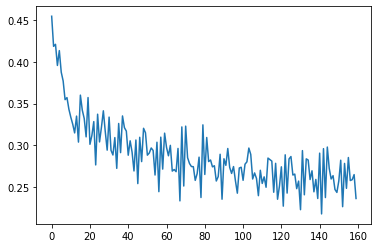

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero

num in waiting_queue: 1
0m 0s (- INF) (0.0%)
loss = 0.017395179718732834
num in waiting_queue: 1
0m 0s (- 3m 43s) (0.25%)
loss = 0.04315131597898223
num in waiting_queue: 1
0m 1s (- 4m 55s) (0.5%)
loss = 0.049619005993008614
num in waiting_queue: 1
0m 2s (- 5m 20s) (0.75%)
loss = 0.06623257179894755
num in waiting_queue: 1
0m 2s (- 4m 43s) (1.0%)
loss = 0.06546185990204899
num in waiting_queue: 1
0m 4s (- 5m 24s) (1.25%)
loss = 0.0650408320384575
num in waiting_queue: 1
0m 4s (- 5m 14s) (1.5%)
loss = 0.0663618467534419
num in waiting_queue: 1
0m 5s (- 5m 32s) (1.7500000000000002%)
loss = 0.06508869408879062
num in waiting_queue: 1
0m 7s (- 5m 52s) (2.0%)
loss = 0.07518591017772754
num in waiting_queue: 1
0m 7s (- 5m 40s) (2.25%)
loss = 0.07302692854920259
num in waiting_queue: 1
0m 8s (- 5m 35s) (2.5%)
loss = 0.0688745496001574
num in waiting_queue: 1
0m 9s (- 5m 50s) (2.75%)
loss = 0.06743965179634255
num in waiting_queue: 1
0m 10s (- 5m 40s) (3.0%)
loss = 0.06857566554715072
num in w

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 2
0m 0s (- INF) (0.0%)
loss = 0.01755567267537117
num in waiting_queue: 2
0m 0s (- 3m 46s) (0.25%)
loss = 0.043361134911802685
num in waiting_queue: 2
0m 1s (- 4m 56s) (0.5%)
loss = 0.05071871922839256
num in waiting_queue: 2
0m 2s (- 5m 16s) (0.75%)
loss = 0.06751618516300956
num in waiting_queue: 2
0m 2s (- 4m 39s) (1.0%)
loss = 0.06645300564151711
num in waiting_queue: 2
0m 4s (- 5m 18s) (1.25%)
loss = 0.06632755205546524
num in waiting_queue: 2
0m 4s (- 5m 8s) (1.5%)
loss = 0.0688629301081671
num in waiting_queue: 2
0m 5s (- 5m 25s) (1.7500000000000002%)
loss = 0.06732539440387152
num in waiting_queue: 2
0m 7s (- 5m 44s) (2.0%)
loss = 0.07834038286711331
num in waiting_queue: 2
0m 7s (- 5m 33s) (2.25%)
loss = 0.0761558708560827
num in waiting_queue: 2
0m 8s (- 5m 26s) (2.5%)
loss = 0.07182042284564365
num in waiting_queue: 2
0m 9s (- 5m 41s) (2.75%)
loss = 0.07023628037171187
num in waiting_queue: 2
0m 10s (- 5m 32s) (3.0%)
loss = 0.07240035895581458
num in wa

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 3
0m 0s (- INF) (0.0%)
loss = 0.016106700524687767
num in waiting_queue: 3
0m 0s (- 3m 45s) (0.25%)
loss = 0.04067631573839621
num in waiting_queue: 3
0m 1s (- 4m 56s) (0.5%)
loss = 0.04677327006079611
num in waiting_queue: 3
0m 2s (- 5m 16s) (0.75%)
loss = 0.06286665450240816
num in waiting_queue: 3
0m 2s (- 4m 39s) (1.0%)
loss = 0.06232341768492649
num in waiting_queue: 3
0m 4s (- 5m 17s) (1.25%)
loss = 0.06211007009351663
num in waiting_queue: 3
0m 4s (- 5m 7s) (1.5%)
loss = 0.0632259953446442
num in waiting_queue: 3
0m 5s (- 5m 24s) (1.7500000000000002%)
loss = 0.06187915688538006
num in waiting_queue: 3
0m 6s (- 5m 42s) (2.0%)
loss = 0.0715912225380264
num in waiting_queue: 3
0m 7s (- 5m 31s) (2.25%)
loss = 0.06954976595467427
num in waiting_queue: 3
0m 8s (- 5m 25s) (2.5%)
loss = 0.06557705065253938
num in waiting_queue: 3
0m 9s (- 5m 39s) (2.75%)
loss = 0.06419264708083493
num in waiting_queue: 3
0m 10s (- 5m 30s) (3.0%)
loss = 0.0663937533982406
num in wai

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 4
0m 0s (- INF) (0.0%)
loss = 0.0204689372330904
num in waiting_queue: 4
0m 0s (- 3m 35s) (0.25%)
loss = 0.04795349516313185
num in waiting_queue: 4
0m 1s (- 4m 51s) (0.5%)
loss = 0.05470942790132193
num in waiting_queue: 4
0m 2s (- 5m 13s) (0.75%)
loss = 0.07139154172111903
num in waiting_queue: 4
0m 2s (- 4m 36s) (1.0%)
loss = 0.0711826543982436
num in waiting_queue: 4
0m 3s (- 5m 15s) (1.25%)
loss = 0.07070808003053945
num in waiting_queue: 4
0m 4s (- 5m 5s) (1.5%)
loss = 0.07165470319326783
num in waiting_queue: 4
0m 5s (- 5m 22s) (1.7500000000000002%)
loss = 0.07059864130553226
num in waiting_queue: 4
0m 6s (- 5m 40s) (2.0%)
loss = 0.0815482004603118
num in waiting_queue: 4
0m 7s (- 5m 29s) (2.25%)
loss = 0.07905735664970272
num in waiting_queue: 4
0m 8s (- 5m 24s) (2.5%)
loss = 0.0747684179666904
num in waiting_queue: 4
0m 9s (- 5m 38s) (2.75%)
loss = 0.07330925900254164
num in waiting_queue: 4
0m 10s (- 5m 29s) (3.0%)
loss = 0.0734767280749915
num in waitin

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 5
0m 0s (- INF) (0.0%)
loss = 0.033788010478019714
num in waiting_queue: 5
0m 0s (- 3m 35s) (0.25%)
loss = 0.061503983356735924
num in waiting_queue: 5
0m 1s (- 4m 51s) (0.5%)
loss = 0.06564648560292664
num in waiting_queue: 5
0m 2s (- 5m 13s) (0.75%)
loss = 0.08072802547605769
num in waiting_queue: 5
0m 2s (- 4m 36s) (1.0%)
loss = 0.08064871331358828
num in waiting_queue: 5
0m 3s (- 5m 15s) (1.25%)
loss = 0.07882164853314559
num in waiting_queue: 5
0m 4s (- 5m 5s) (1.5%)
loss = 0.08007418593300171
num in waiting_queue: 5
0m 5s (- 5m 22s) (1.7500000000000002%)
loss = 0.07858157617000627
num in waiting_queue: 5
0m 6s (- 5m 40s) (2.0%)
loss = 0.08979141859360683
num in waiting_queue: 5
0m 7s (- 5m 29s) (2.25%)
loss = 0.08721260722358148
num in waiting_queue: 5
0m 8s (- 5m 24s) (2.5%)
loss = 0.0830110888928175
num in waiting_queue: 5
0m 9s (- 5m 39s) (2.75%)
loss = 0.08178613779579734
num in waiting_queue: 5
0m 10s (- 5m 29s) (3.0%)
loss = 0.08082428088119208
num in 

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 6
0m 0s (- INF) (0.0%)
loss = 0.019470974802970886
num in waiting_queue: 6
0m 0s (- 3m 42s) (0.25%)
loss = 0.047978181137957356
num in waiting_queue: 6
0m 1s (- 4m 55s) (0.5%)
loss = 0.055045424916204955
num in waiting_queue: 6
0m 2s (- 5m 16s) (0.75%)
loss = 0.07273693875439706
num in waiting_queue: 6
0m 2s (- 4m 40s) (1.0%)
loss = 0.07135739629497616
num in waiting_queue: 6
0m 4s (- 5m 19s) (1.25%)
loss = 0.0709813098587534
num in waiting_queue: 6
0m 4s (- 5m 9s) (1.5%)
loss = 0.07348581508840205
num in waiting_queue: 6
0m 5s (- 5m 26s) (1.7500000000000002%)
loss = 0.07216799756328404
num in waiting_queue: 6
0m 7s (- 5m 44s) (2.0%)
loss = 0.08559228209663688
num in waiting_queue: 6
0m 7s (- 5m 33s) (2.25%)
loss = 0.08337416068988514
num in waiting_queue: 6
0m 8s (- 5m 27s) (2.5%)
loss = 0.07880151512488576
num in waiting_queue: 6
0m 9s (- 5m 42s) (2.75%)
loss = 0.07714326821502533
num in waiting_queue: 6
0m 10s (- 5m 33s) (3.0%)
loss = 0.07984253276170285
num in

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 7
0m 0s (- INF) (0.0%)
loss = 0.025306718423962593
num in waiting_queue: 7
0m 0s (- 3m 35s) (0.25%)
loss = 0.04915971258147196
num in waiting_queue: 7
0m 1s (- 4m 56s) (0.5%)
loss = 0.054020404017397335
num in waiting_queue: 7
0m 2s (- 5m 17s) (0.75%)
loss = 0.06819316955103029
num in waiting_queue: 7
0m 2s (- 4m 40s) (1.0%)
loss = 0.06861536668204679
num in waiting_queue: 7
0m 4s (- 5m 17s) (1.25%)
loss = 0.06801913390118702
num in waiting_queue: 7
0m 4s (- 5m 6s) (1.5%)
loss = 0.06965868758251433
num in waiting_queue: 7
0m 5s (- 5m 23s) (1.7500000000000002%)
loss = 0.0685986657692513
num in waiting_queue: 7
0m 6s (- 5m 40s) (2.0%)
loss = 0.07800928183635812
num in waiting_queue: 7
0m 7s (- 5m 29s) (2.25%)
loss = 0.07599893705612355
num in waiting_queue: 7
0m 8s (- 5m 23s) (2.5%)
loss = 0.07213053482556993
num in waiting_queue: 7
0m 9s (- 5m 37s) (2.75%)
loss = 0.07101480573046583
num in waiting_queue: 7
0m 10s (- 5m 28s) (3.0%)
loss = 0.07186210668869009
num in 

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 8
0m 0s (- INF) (0.0%)
loss = 0.018807757645845413
num in waiting_queue: 8
0m 0s (- 3m 38s) (0.25%)
loss = 0.047163059426979584
num in waiting_queue: 8
0m 1s (- 4m 51s) (0.5%)
loss = 0.0538998046623809
num in waiting_queue: 8
0m 2s (- 5m 13s) (0.75%)
loss = 0.07150500243709933
num in waiting_queue: 8
0m 2s (- 4m 36s) (1.0%)
loss = 0.0704813642518186
num in waiting_queue: 8
0m 3s (- 5m 14s) (1.25%)
loss = 0.07051155250519514
num in waiting_queue: 8
0m 4s (- 5m 4s) (1.5%)
loss = 0.07121497430823377
num in waiting_queue: 8
0m 5s (- 5m 21s) (1.7500000000000002%)
loss = 0.06994038244420794
num in waiting_queue: 8
0m 6s (- 5m 39s) (2.0%)
loss = 0.08001211013093039
num in waiting_queue: 8
0m 7s (- 5m 28s) (2.25%)
loss = 0.07776071265298914
num in waiting_queue: 8
0m 8s (- 5m 22s) (2.5%)
loss = 0.07345870992463857
num in waiting_queue: 8
0m 9s (- 5m 36s) (2.75%)
loss = 0.07209758302364666
num in waiting_queue: 8
0m 10s (- 5m 27s) (3.0%)
loss = 0.0733693347250935
num in wa

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 9
0m 0s (- INF) (0.0%)
loss = 0.019284164533019066
num in waiting_queue: 9
0m 0s (- 3m 39s) (0.25%)
loss = 0.0478690191256729
num in waiting_queue: 9
0m 1s (- 4m 50s) (0.5%)
loss = 0.05529937250096174
num in waiting_queue: 9
0m 2s (- 5m 13s) (0.75%)
loss = 0.07279542974767185
num in waiting_queue: 9
0m 2s (- 4m 38s) (1.0%)
loss = 0.07164346549387385
num in waiting_queue: 9
0m 4s (- 5m 17s) (1.25%)
loss = 0.07145496461467415
num in waiting_queue: 9
0m 4s (- 5m 6s) (1.5%)
loss = 0.07260081669712654
num in waiting_queue: 9
0m 5s (- 5m 23s) (1.7500000000000002%)
loss = 0.0712510868382286
num in waiting_queue: 9
0m 6s (- 5m 41s) (2.0%)
loss = 0.08281392139601118
num in waiting_queue: 9
0m 7s (- 5m 30s) (2.25%)
loss = 0.08055211982311128
num in waiting_queue: 9
0m 8s (- 5m 24s) (2.5%)
loss = 0.07609441319923146
num in waiting_queue: 9
0m 9s (- 5m 38s) (2.75%)
loss = 0.07473451866105467
num in waiting_queue: 9
0m 10s (- 5m 28s) (3.0%)
loss = 0.0754935121864142
num in wai

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 10
0m 0s (- INF) (0.0%)
loss = 0.019634293392300606
num in waiting_queue: 10
0m 0s (- 3m 44s) (0.25%)
loss = 0.04636680851267143
num in waiting_queue: 10
0m 1s (- 4m 52s) (0.5%)
loss = 0.05331038080510639
num in waiting_queue: 10
0m 2s (- 5m 14s) (0.75%)
loss = 0.07018182691066496
num in waiting_queue: 10
0m 2s (- 4m 38s) (1.0%)
loss = 0.06974975553500216
num in waiting_queue: 10
0m 3s (- 5m 15s) (1.25%)
loss = 0.06932260620170365
num in waiting_queue: 10
0m 4s (- 5m 5s) (1.5%)
loss = 0.06999878641828651
num in waiting_queue: 10
0m 5s (- 5m 22s) (1.7500000000000002%)
loss = 0.06882788118919436
num in waiting_queue: 10
0m 6s (- 5m 39s) (2.0%)
loss = 0.07867017414788773
num in waiting_queue: 10
0m 7s (- 5m 28s) (2.25%)
loss = 0.07636097627231381
num in waiting_queue: 10
0m 8s (- 5m 23s) (2.5%)
loss = 0.07208970295597274
num in waiting_queue: 10
0m 9s (- 5m 37s) (2.75%)
loss = 0.07070313578236613
num in waiting_queue: 10
0m 10s (- 5m 27s) (3.0%)
loss = 0.071224336716

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 11
0m 0s (- INF) (0.0%)
loss = 0.029175858944654465
num in waiting_queue: 11
0m 0s (- 3m 37s) (0.25%)
loss = 0.057017410597340626
num in waiting_queue: 11
0m 1s (- 4m 50s) (0.5%)
loss = 0.06352370724614177
num in waiting_queue: 11
0m 2s (- 5m 13s) (0.75%)
loss = 0.07956065973567386
num in waiting_queue: 11
0m 2s (- 4m 37s) (1.0%)
loss = 0.0785133464080168
num in waiting_queue: 11
0m 3s (- 5m 15s) (1.25%)
loss = 0.07739116728086681
num in waiting_queue: 11
0m 4s (- 5m 5s) (1.5%)
loss = 0.08035043976651352
num in waiting_queue: 11
0m 5s (- 5m 22s) (1.7500000000000002%)
loss = 0.07830178880618072
num in waiting_queue: 11
0m 6s (- 5m 39s) (2.0%)
loss = 0.09121514276175956
num in waiting_queue: 11
0m 7s (- 5m 28s) (2.25%)
loss = 0.08886281788799462
num in waiting_queue: 11
0m 8s (- 5m 23s) (2.5%)
loss = 0.08426192764303472
num in waiting_queue: 11
0m 9s (- 5m 37s) (2.75%)
loss = 0.08323870585845397
num in waiting_queue: 11
0m 10s (- 5m 27s) (3.0%)
loss = 0.084691879824

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num in waiting_queue: 12
0m 0s (- INF) (0.0%)
loss = 0.016930097714066505
num in waiting_queue: 12
0m 0s (- 3m 38s) (0.25%)
loss = 0.04261434010484002
num in waiting_queue: 12
0m 1s (- 4m 50s) (0.5%)
loss = 0.0477482479154354
num in waiting_queue: 12
0m 2s (- 5m 13s) (0.75%)
loss = 0.06335211806600133
num in waiting_queue: 12
0m 2s (- 4m 37s) (1.0%)
loss = 0.06279935617363308
num in waiting_queue: 12
0m 4s (- 5m 17s) (1.25%)
loss = 0.06258925165542785
num in waiting_queue: 12
0m 4s (- 5m 7s) (1.5%)
loss = 0.06441333818203601
num in waiting_queue: 12
0m 5s (- 5m 24s) (1.7500000000000002%)
loss = 0.06315803647198727
num in waiting_queue: 12
0m 7s (- 5m 43s) (2.0%)
loss = 0.07364064095150909
num in waiting_queue: 12
0m 7s (- 5m 32s) (2.25%)
loss = 0.07151928497990082
num in waiting_queue: 12
0m 8s (- 5m 25s) (2.5%)
loss = 0.06758923952624497
num in waiting_queue: 12
0m 9s (- 5m 39s) (2.75%)
loss = 0.06614218644277604
num in waiting_queue: 12
0m 10s (- 5m 30s) (3.0%)
loss = 0.0679537548206

KeyboardInterrupt: ignored

In [ ]:
results = pd.DataFrame({'num_pt':[],'Avg_Loss':[],'Accuracy':[],'Precision':[],'Recall':[],'F1':[]})
last_waiting_queue_num = progress_json['temp_waiting_queue_num']
for fold in range(1,6):
  # testing-----------------------------------------------------------------------------------------------------------------------------
  if fold<progress_json['fold']:
    continue
  #建立當前fold的輸出檔案
  if not os.path.isfile('{}/current/fold_{}/test_result.csv'.format(path,fold)):
    pd.DataFrame({'num_pt':[],'Avg_Loss':[],'Accuracy':[],'Precision':[],'Recall':[],'F1':[]}).to_csv('{}/current/fold_{}/test_result.csv'.format(path,fold),index=False)
  #讀取loss並選出較好的節點
  f = open('{}/current/fold_{}/loss.txt'.format(path,fold), 'r')
  losses = [float(i) for i in list(f.read().split("\n")[:-1])]
  f.close()
  waiting_queue=get_best_pt(losses,best_n)

  #迭代候選節點
  temp_waiting_queue_num = 0
  for test_pt in waiting_queue[waiting_queue_begin:waiting_queue_end]:
    temp_waiting_queue_num+=1
    #走到當前進度
    if temp_waiting_queue_num<=last_waiting_queue_num:
      continue

    # testing error
    # 測試
    result = evaluate_model(token_data_read, list(range(token_data_read.shape[0])),test_pt)
    # 結果輸出
    print("start writing result")
    result.to_csv('{}/current/fold_{}/test_result.csv'.format(path,fold), mode='a', header=False,index=False)

    #更新進度
    print("start saving progress")
    with open('{}/current/test_progress.json'.format(path), 'w') as progress_json_file:
        json.dump({'fold':fold,'temp_waiting_queue_num':temp_waiting_queue_num}, progress_json_file)
    print("done saving")

    results = results.append(result, ignore_index=True)
  print(results)

  last_waiting_queue_num=0
  break

print("end")
